In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',300)
sns.set(font_scale=2.0)


In [108]:
titanic_df = pd.read_csv('/Users/prakashchandraprasad/Documents/kaggle-datasets/titanic/train.csv')

In [109]:
# get summary
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [110]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
titanic_df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [112]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [113]:
# so we have null values in age and cabin
fig,ax = plt.subplots(figsize=(10,12))


In [114]:
sns.boxplot(x='Survived',y='Age',data=titanic_df,ax=ax)

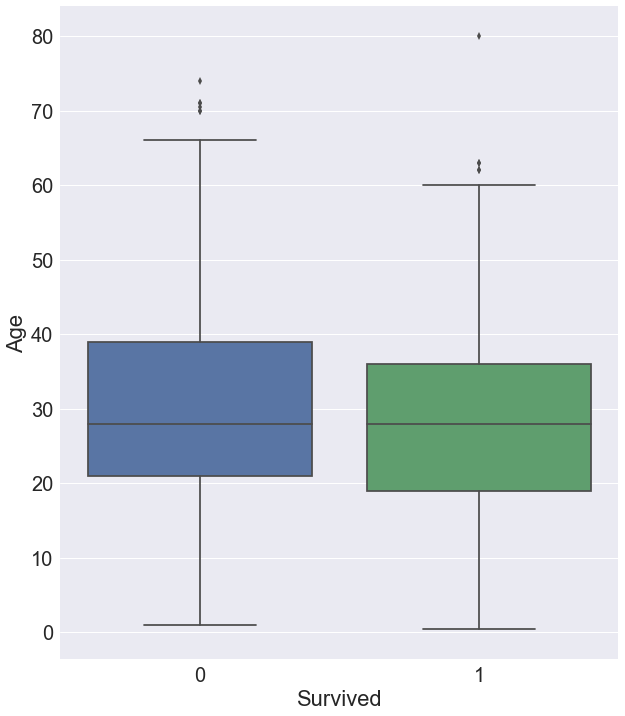

In [115]:
plt.show()

In [116]:
# from the boxplot it is clear that those who have survived is in the age group of 20-40,
# so we can impute the missing age values wthe the mean of age

In [117]:
titanic_df['Cabin'].isnull().sum()

687

In [118]:
titanic_df.shape

(891, 12)

In [119]:
# as we can see from the above two results we can drop the cabin columns
n_titanic_df = titanic_df.copy()

In [120]:
n_titanic_df.drop('Cabin',axis=1,inplace=True)

In [121]:
n_titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [122]:
#check for embarked, the result show it is categorical variable we will tackle later
# n_titanic_df['Embarked']

In [123]:
np.mean(n_titanic_df['Age'])

29.69911764705882

In [124]:
np.mean([20,40])

30.0

In [125]:
n_titanic_df['Age'].fillna(np.mean(n_titanic_df['Age']),inplace=True)

In [126]:
# n_titanic_df['Age'].isnull().sum()

In [127]:
n_titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [128]:
#we will use labelencoder to convert the object types

In [129]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()

In [130]:
for col in (list(n_titanic_df.columns)):
    if n_titanic_df[col].dtypes=='object':
        n_titanic_df[col]=en.fit_transform(n_titanic_df[col])

In [131]:
#feature selection and feature ranking

In [156]:
from sklearn.feature_selection import RFE
from sklearn.cross_validation import StratifiedKFold

In [157]:
d_titanic_df = n_titanic_df.copy()


In [158]:
X_train,y_train = d_titanic_df.drop(['Survived'],axis=1),n_titanic_df[['Survived']]

In [159]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')

In [160]:
rfe=RFE(estimator=svc,n_features_to_select=9)

In [161]:
selector = rfe.fit(X_train,y_train)

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [162]:
selector.n_features_

9

In [163]:
selector.ranking_


array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [166]:
selector.score(X_train,y_train)

0.79461279461279466